# Task 1 from sem 2 about pendulum

## Formulation of the problem

law of moition:

$$
\ddot x + x = u.
$$

Where control system is:

$$
\left\{
    \begin{array}{l}
        \dot x_1 = x_2,\\
        \dot x_2 = - x_1 + u,\\
        x_1(0) = 1,\\
        x_2(0) = 0,\\
        u(t) =
        \begin{cases}
            -1, t \in [0, \pi],\\
            1, t \in (\pi, 2\pi].
        \end{cases}
    \end{array}
\right.
$$

We are to find the state of the system (position), when $t = 2\pi$.

## Full manual solution

First, determine matrices $A$, $B$ and $f$:

$$
A = \left( \begin{array}{cc}
        0 & 1 \\
        -1 & 0
    \end{array} \right),
\quad
x = \left( \begin{array}{cc}
        x_1\\
        x_2
    \end{array} \right),
\quad
B = \left( \begin{array}{cc}
        0 & 0 \\
        0 & 1
    \end{array} \right),
\quad
u = \left( \begin{array}{cc}
        u'\\
        u
    \end{array} \right),
\quad
f = \left( \begin{array}{cc}
        0\\
        0
    \end{array} \right).
$$

Then, we are to find the solution of the homogeneous linear system. To do it we should determine the fundamental matrix
$X(t, 0) = e^{At}$.

First, we fide eigenvalues of matrix A:

$$
\left| A - \lambda I \right| = 0,
\quad
\left| \begin{array}{cc}
    -\lambda & 1\\
    -1 & -\lambda
\end{array} \right| = 0,
\quad
\lambda \in \{ -i, i \}
$$

Corresponding eigenvectors are:

$$
\lambda_1 = -i \leftrightarrow v_1 = 
    \left( \begin{array}{cc}
        i\\
        1
    \end{array} \right),
\qquad
\lambda_2 = i \leftrightarrow v_2 = 
    \left( \begin{array}{cc}
        -i\\
        1
    \end{array} \right).
$$

Here we have to different complex eigenvalues of matrix, which rang is 2, and the soltion of the differential equation
is linear combination of the real an imaginary parts of the corresponding solution function $ve^{\lambda t}$.
In our problem we have
$$
ve^{\lambda t} = 
\left( \begin{array}{cc}
        i\\
        1
\end{array} \right)
e^{-it} = 
\left( \begin{array}{cc}
        i\\
        1
\end{array} \right)
\bigl(\cos(t) - i \sin(t)\bigr),
$$
Therefore, general solution (not fundamental matrix yet) is:

$$
\left( \begin{array}{cc}
    C_1 \sin(t) + C_2 \cos(t)\\
    C_1 \cos(t) - C_2 \sin(t)
\end{array} \right).
$$

To make fundamental matrix from this one we should find constants $C_1$ and $C_2$ form the condition: $X(t, 0) = I$.
The first column of $X(t, 0)$ is our general solution but with condition: $x(0) = (1, 0)^T$, and the second column — condition $x(0) = (0, 1)^T$.

$$
X(t, 0) =
\left( \begin{array}{cc}
    \cos(t) & \sin(t)\\
    -\sin(t) & \cos(t)
\end{array} \right).
$$

Now we are ready to write down the Cauchy formula to find trajectory:

$$
x(t) = X(t, 0)
\left( \begin{array}{cc}
    1\\
    0
\end{array} \right) +
\int\limits_0^t X(t, \tau) \bigl( Bu(\tau) + f\bigr) d\tau =
\left( \begin{array}{cc}
    \cos(t)\\
    -\sin(t)
\end{array} \right) +
\int\limits_0^t u(\tau)
\left( \begin{array}{cc}
    \sin(t-\tau)\\
    \cos(t-\tau)
\end{array} \right)
d\tau
\\
x(2\pi) = 
\left( \begin{array}{cc}
    1\\
    0
\end{array} \right) +
\int\limits_0^\pi
\left( \begin{array}{cc}
    -\sin(2\pi - \tau)\\
    -\cos(2\pi - \tau)
\end{array} \right)d\tau +
\int\limits_\pi^{2\pi}
\left( \begin{array}{cc}
    \sin(2\pi - \tau)\\
    \cos(2\pi - \tau)
\end{array} \right) d\tau =
\left( \begin{array}{cc}
    5\\
    0
\end{array} \right)
$$

## Sympy solution
### Preparing imports

In [60]:
from sympy import *
init_printing()

### Preparing symbols

$
u(t) = \left\{ \begin{array}{r}
    -1, \quad t \in [0, \pi] \\
    1, \quad t \in (\pi, 2\pi]
\end{array} \right. = sgn(t - \pi).
$

$$
A = \left( \begin{array}{cc}
    0 & 1 \\
    -1 & 0
\end{array} \right),
\quad
B = \left( \begin{array}{cc}
    0 & 0 \\
    0 & 1
\end{array} \right),
\quad
u = \left( \begin{array}{cc}
    0 \\
    sgn(t - \pi)
\end{array} \right),
\quad
x_0 = \left( \begin{array}{cc}
    1 \\
    0
\end{array} \right),
\quad
f = \left( \begin{array}{cc}
    0 \\
    0
\end{array} \right).
$$

In [61]:
t = Symbol('t', nonnegative=True, real=True)
A = Matrix([[0, 1], [-1, 0]])
B = Matrix([[0], [1]])
u = sign(t - pi)
x0 = Matrix([[1], [0]])
f = Matrix([[0], [0]])

### Evaluationg matrix exponent

Here we find general solution for matrix differential equation
$$
\begin{cases}
\dot X(t) = AX(t) \\
X(0) = I
\end{cases}
$$
to evaluate matrix exponent.

Eigenvalues and eigenvectors:



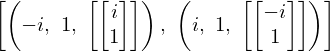

In [62]:
eig_info = A.eigenvects()
print('Eigenvalues and eigenvectors:\n')
eig_info

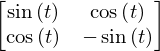

In [63]:
v = eig_info[0][2][0]
solution_basis = (v * exp(eig_info[0][0] * t)).as_real_imag()
solution_basis = solution_basis[0].row_join(solution_basis[1])
solution_basis

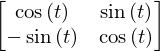

In [64]:
C = Matrix(solution_basis.subs(t, 0)).LUsolve(eye(2))
expA = Matrix(solution_basis * C)
expA

And fundamental matrix $X(t, t_0) = e^{A(t-t_0)}$. In our problem $t_0 = 0$, therefore $X(t, t_0) = X(t, 0) = e^{At}$.
But we should prepare $\tau$ for integrating.

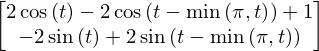

In [65]:
tau = Symbol('tau', real=True, nonnegative=True)
x = expA * x0 + integrate(expA.subs(t, t - tau) * B * u.subs(t, tau), (tau, 0, t))
x

In [66]:
%%time
x.subs(t, 2 * pi)

CPU times: user 535 µs, sys: 0 ns, total: 535 µs
Wall time: 545 µs


## Some plotting

In [67]:
from sympy.plotting import *

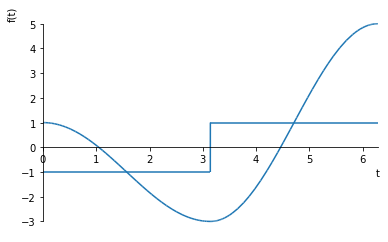

In [72]:
plot(x[0], u, (t, 0, 2 * pi))

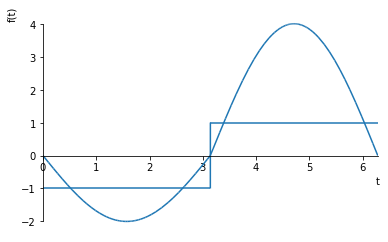

In [73]:
plot(x[1], u, (t, 0, 2 * pi))

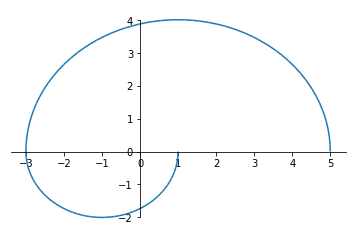

In [74]:
plot_parametric(x[0], x[1], (t, 0, 2 * pi))